In [2]:
% matplotlib inline
import networkx as nx
import copy
import random
import matplotlib.pyplot as plt
import numpy as np

In [111]:
def random_0k(G0, nswap=1, max_tries=100):    #基于随机断边重连的0阶零模型
    G = copy.deepcopy(G0)      
    if nswap>max_tries:
            raise nx.NetworkXError("Number of swaps > number of tries allowed.")
    if len(G) < 3:
        raise nx.NetworkXError("Graph has less than three nodes.")
    n = 0
    swapcount = 0
    while swapcount < nswap:
        u,v = random.choice(G.edges())      #随机选网络中的一条要断开的边
        x,y = random.sample(G.nodes(),2)    #随机找两个不相连的节点
        if (x,y) not in G.edges() and (y,x) not in G.edges():
            G.remove_edge(u,v)              #断旧边
            G.add_edge(x,y)                 #连新边
            swapcount+=1
        if n >= max_tries:
            e=('Maximum number of swap attempts (%s) exceeded '%n +
            'before desired swaps achieved (%s).'%nswap)
            print e
            break
        n += 1
    return G

def random_0k_with_p(G0, p=1):    #基于随机断边重连的0阶零模型
    G = copy.deepcopy(G0)      
    if p<0 or p>1:
            raise nx.NetworkXError("Invalid p!.")
    K = len(G.edges())
    N = len(G.nodes())
    max_tries = K *p
    rewiring_tries = 0
    while rewiring_tries < max_tries:
        u,v = random.choice(G.edges())      #随机选网络中的一条要断开的边
        x,y = random.sample(G.nodes(),2)    #随机找两个不相连的节点
        if (x,y) not in G.edges() and (y,x) not in G.edges():
            G.remove_edge(u,v)              #断旧边
            G.add_edge(x,y)                 #连新边
            rewiring_tries+=1
    return G

def calculate_e_global(G):
    avg = 0.0
    for node in G:
        path_length_list=nx.single_source_shortest_path_length(G, node)
        for e in path_length_list.values():
            if e != 0:
                avg += 1.0/e
            else:
                avg += 0
    n=len(G)
    avg = avg/(n*(n-1))
    return avg
    
def calculate_e_local(G):
    avg = 0.0
    for node in G:
        avg += calculate_e_global(G.subgraph(nx.bfs_successors(G,node)[node]))
    avg = avg/len(G)
    return avg

In [3]:
G = nx.random_graphs.gnm_random_graph(1000, 10000)  
K = len(G.edges())
N = len(G.nodes())
k = 2.0*K/N
print k, K, N

20.0 10000 1000


In [114]:
G1 = random_0k_with_p(G, 0.1)
K = len(G1.edges())
N = len(G1.nodes())
k = 2.0*K/N
print k, K, N

20.0 10000 1000


In [115]:
calculate_e_global(G1)

0.4004748081387495

In [116]:
calculate_e_local(G1)

0.02442870715514657

In [90]:
calculate_e_global(G1)

3.7996650515419357e-07

In [91]:
calculate_e_local(G1)

0.01133313624219736

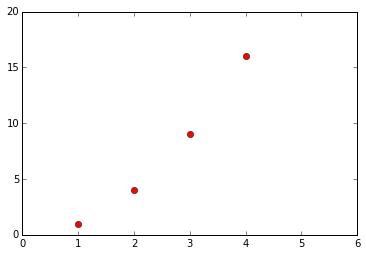

In [105]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

In [100]:
eg = []
el = []
def calculate_e(G):
    global eg
    global el
    p = 0.0
    while p < 1:
        tempG = random_0k_with_p(G, p)
        eg.append(calculate_e_global(tempG))
        eg.append(calculate_e_local(tempG))
        p += 0.01
calculate_e(G)

KeyboardInterrupt: 

In [5]:
path_length_list=nx.single_source_shortest_path_length(G, 1)

In [8]:
path_length_list[0]

3

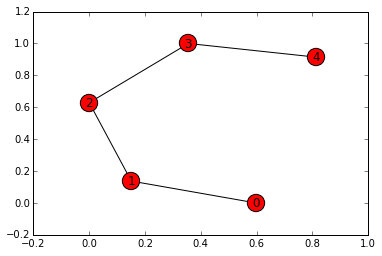

In [7]:
G=nx.path_graph(5)
nx.draw_networkx(G)